<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/tcc_hoteis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monta o google drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Autentica o notebook

In [4]:
from google.colab import auth
import gspread
from google.auth import default

auth.authenticate_user()

creds, _ = default()

gc = gspread.authorize(creds)

# Dados dos hoteis

## Carrega a planilha

In [5]:
ws = gc.open('PGC-hotels')
emerson = ws.worksheet('LISTA HOTEIS')

## Cria o DataFrame

In [6]:
import pandas as pd

df = pd.DataFrame(emerson.get_all_records())
states = pd.DataFrame({'state': ["AC",
"AL",
"AM",
"AP",
"BA",
"CE",
"DF",
"ES",
"GO",
"MA",
"MG",
"MS",
"MT",
"PA",
"PB",
"PE",
"PI",
"PR",
"RJ",
"RN",
"RO",
"RR",
"RS",
"SC",
"SE",
"SP",
"TO"]})

df[:1]

,done,name,n_reviews,sort_by,hl,state,overall_rating,stars,url,all_inclusive,region,google_travel,busca,url_travel,qtd_reviews
0,0,"""Hotel Beira Mar""",-1,newest,pt-br,SE,2.7,,https://maps.google.com/?cid=6815042894715727148,0,NORDESTE,,API,-,508


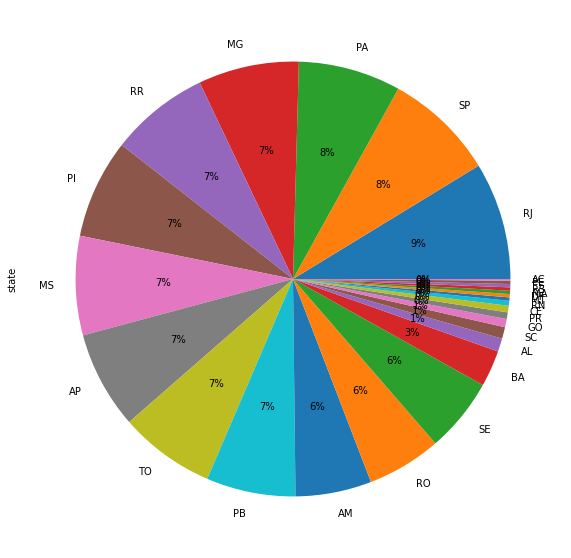

In [7]:
df['state'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [26]:
df['state'].value_counts()[:8]

RJ    71
SP    67
PA    62
MG    61
RR    60
PI    60
MS    60
AP    59
Name: state, dtype: int64

In [60]:
df[['state', 'overall_rating']].groupby(['state']).mean().sort_values('overall_rating', ascending= False)[:7]

,overall_rating
state,
RS,4.700000
AL,4.637500
AC,4.600000
AM,4.530435
SC,4.500000
CE,4.475000
GO,4.460000


In [27]:
df[['state', 'qtd_reviews']].groupby(['state']).sum().sort_values('qtd_reviews', ascending= False)[:6]

,qtd_reviews
state,
RJ,231947
SP,169586
BA,107716
MG,107067
PB,68188
PA,62194


In [ ]:
val4,22

In [61]:
df['state'].value_counts()

RJ    71
SP    67
PA    62
MG    61
RR    60
PI    60
MS    60
AP    59
TO    58
PB    54
AM    46
RO    45
SE    45
BA    22
AL     8
SC     7
GO     5
PR     4
CE     4
RN     3
MT     2
DF     2
MA     2
RS     2
ES     2
PE     2
AC     1
Name: state, dtype: int64

In [57]:
df[['state', 'overall_rating', 'qtd_reviews']].groupby(['state']).agg({'qtd_reviews': [ 'sum', 'min', 'max' ], 'overall_rating': [ 'mean', 'min', 'max' ]})22 

qtd_reviews              overall_rating          
              sum   min    max           mean  min  max
state                                                  
AC           1696  1696   1696       4.600000  4.6  4.6
AL          33345   241   7580       4.637500  4.0  4.8
AM          45509    11   3947       4.530435  3.7  5.0
AP          13843     3   1101       4.077966  3.0  5.0
BA         107716   284  23795       4.340909  3.8  4.8
CE          14164   275   8152       4.475000  4.3  4.6
DF           2666   970   1696       4.000000  3.8  4.2
ES           5893  1213   4680       4.400000  4.4  4.4
GO          32167  1756  11360       4.460000  4.1  4.7
MA           3827   927   2900       3.550000  3.2  3.9
MG         107067   107  11231       4.359016  3.4  4.9
MS          53603    52   3190       4.395000  3.8  4.8
MT            727   156    571       3.750000  3.4  4.1
PA          62194    17   4925       4.267742  3.0  4.9
PB          68188    30   4238       4.362963  3.8  4.8
PE           6663  2558   4105       4.300000  3.9  4.7
PI          38429     8   2774       4.320000  3.5  5.0
PR           9672  1557   3774       4.350000  3.9  4.7
RJ         231947    91  21633       4.226761  2.8  4.8
RN          18615  2867  11359       4.300000  4.0  4.7
RO          32056    60   4738       4.340000  3.8  4.7
RR          18202     3   2151       4.198333  3.3  5.0
RS           9493  1285   8208       4.700000  4.7  4.7
SC          32621    74  20767       4.500000  4.1  4.8
SE          61285     1   5024       4.277778  2.7  5.0
SP         169586   140  12472       4.207463  3.1  4.9
TO          31631    12   2026       4.272414  2.7  4.8